Câu 1


In [1]:
NAME = "Hồ Thành Đạt - 6351071017"

In [2]:
import pandas as pd

train_data = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/6351071017_Lab2/main/Dataset/adult.data.csv', header=0)

test_data = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/6351071017_Lab2/main/Dataset/adult.test.csv', header=0)

print(NAME)
print("Number of training data:", len(train_data))
print("Number of test data:", len(test_data))

Hồ Thành Đạt - 6351071017
Number of training data: 32561
Number of test data: 16281


Câu 2

In [3]:
train_data = train_data.replace('?', pd.NA).dropna()
test_data = test_data.replace('?', pd.NA).dropna()

train_data = train_data.drop('fnlwgt', axis=1)

data = pd.concat([train_data, test_data], ignore_index=True)
print(NAME)
print(data.info())

Hồ Thành Đạt - 6351071017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None


Câu 3

Hồ Thành Đạt - 6351071017


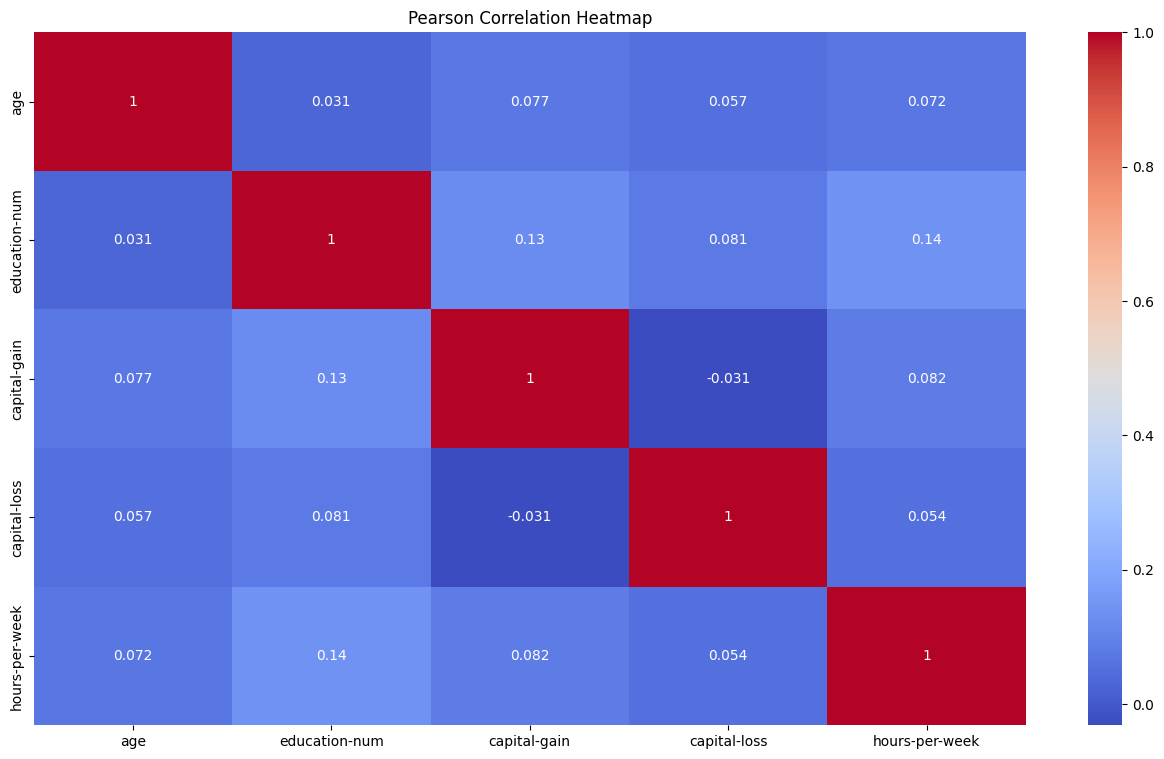

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(NAME)

numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

Câu 4

In [5]:
print(NAME)

features = data.drop('income', axis=1)
labels = data['income']

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Hồ Thành Đạt - 6351071017
Features shape: (48842, 13)
Labels shape: (48842,)


Câu 5

In [6]:
print(NAME)
categorical_columns = features.select_dtypes(exclude=['int64']).columns
features_onehot = pd.get_dummies(features, columns=categorical_columns)

print("One-hot encoded features shape:", features_onehot.shape)
print("Categorical columns:", list(categorical_columns))

Hồ Thành Đạt - 6351071017
One-hot encoded features shape: (48842, 107)
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


Câu 6

In [7]:
n_train = 30162
X_train = features_onehot[:n_train]
X_test = features_onehot[n_train:]
y_train = labels[:n_train]
y_test = labels[n_train:]

print(NAME)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Hồ Thành Đạt - 6351071017
X_train shape: (30162, 107)
X_test shape: (18680, 107)
y_train shape: (30162,)
y_test shape: (18680,)


Câu 7

Hồ Thành Đạt - 6351071017
ID3 Accuracy: 0.8220556745182013
ID3 Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88     14230
        >50K       0.63      0.60      0.62      4450

    accuracy                           0.82     18680
   macro avg       0.76      0.75      0.75     18680
weighted avg       0.82      0.82      0.82     18680



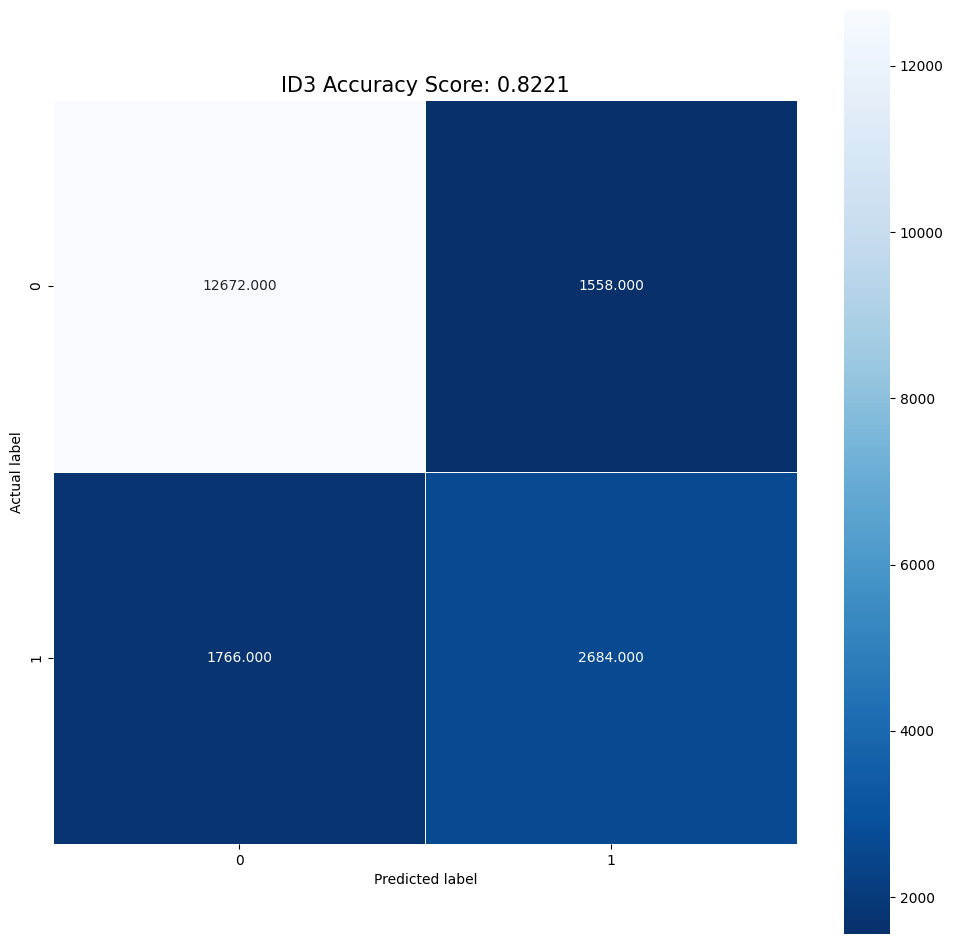

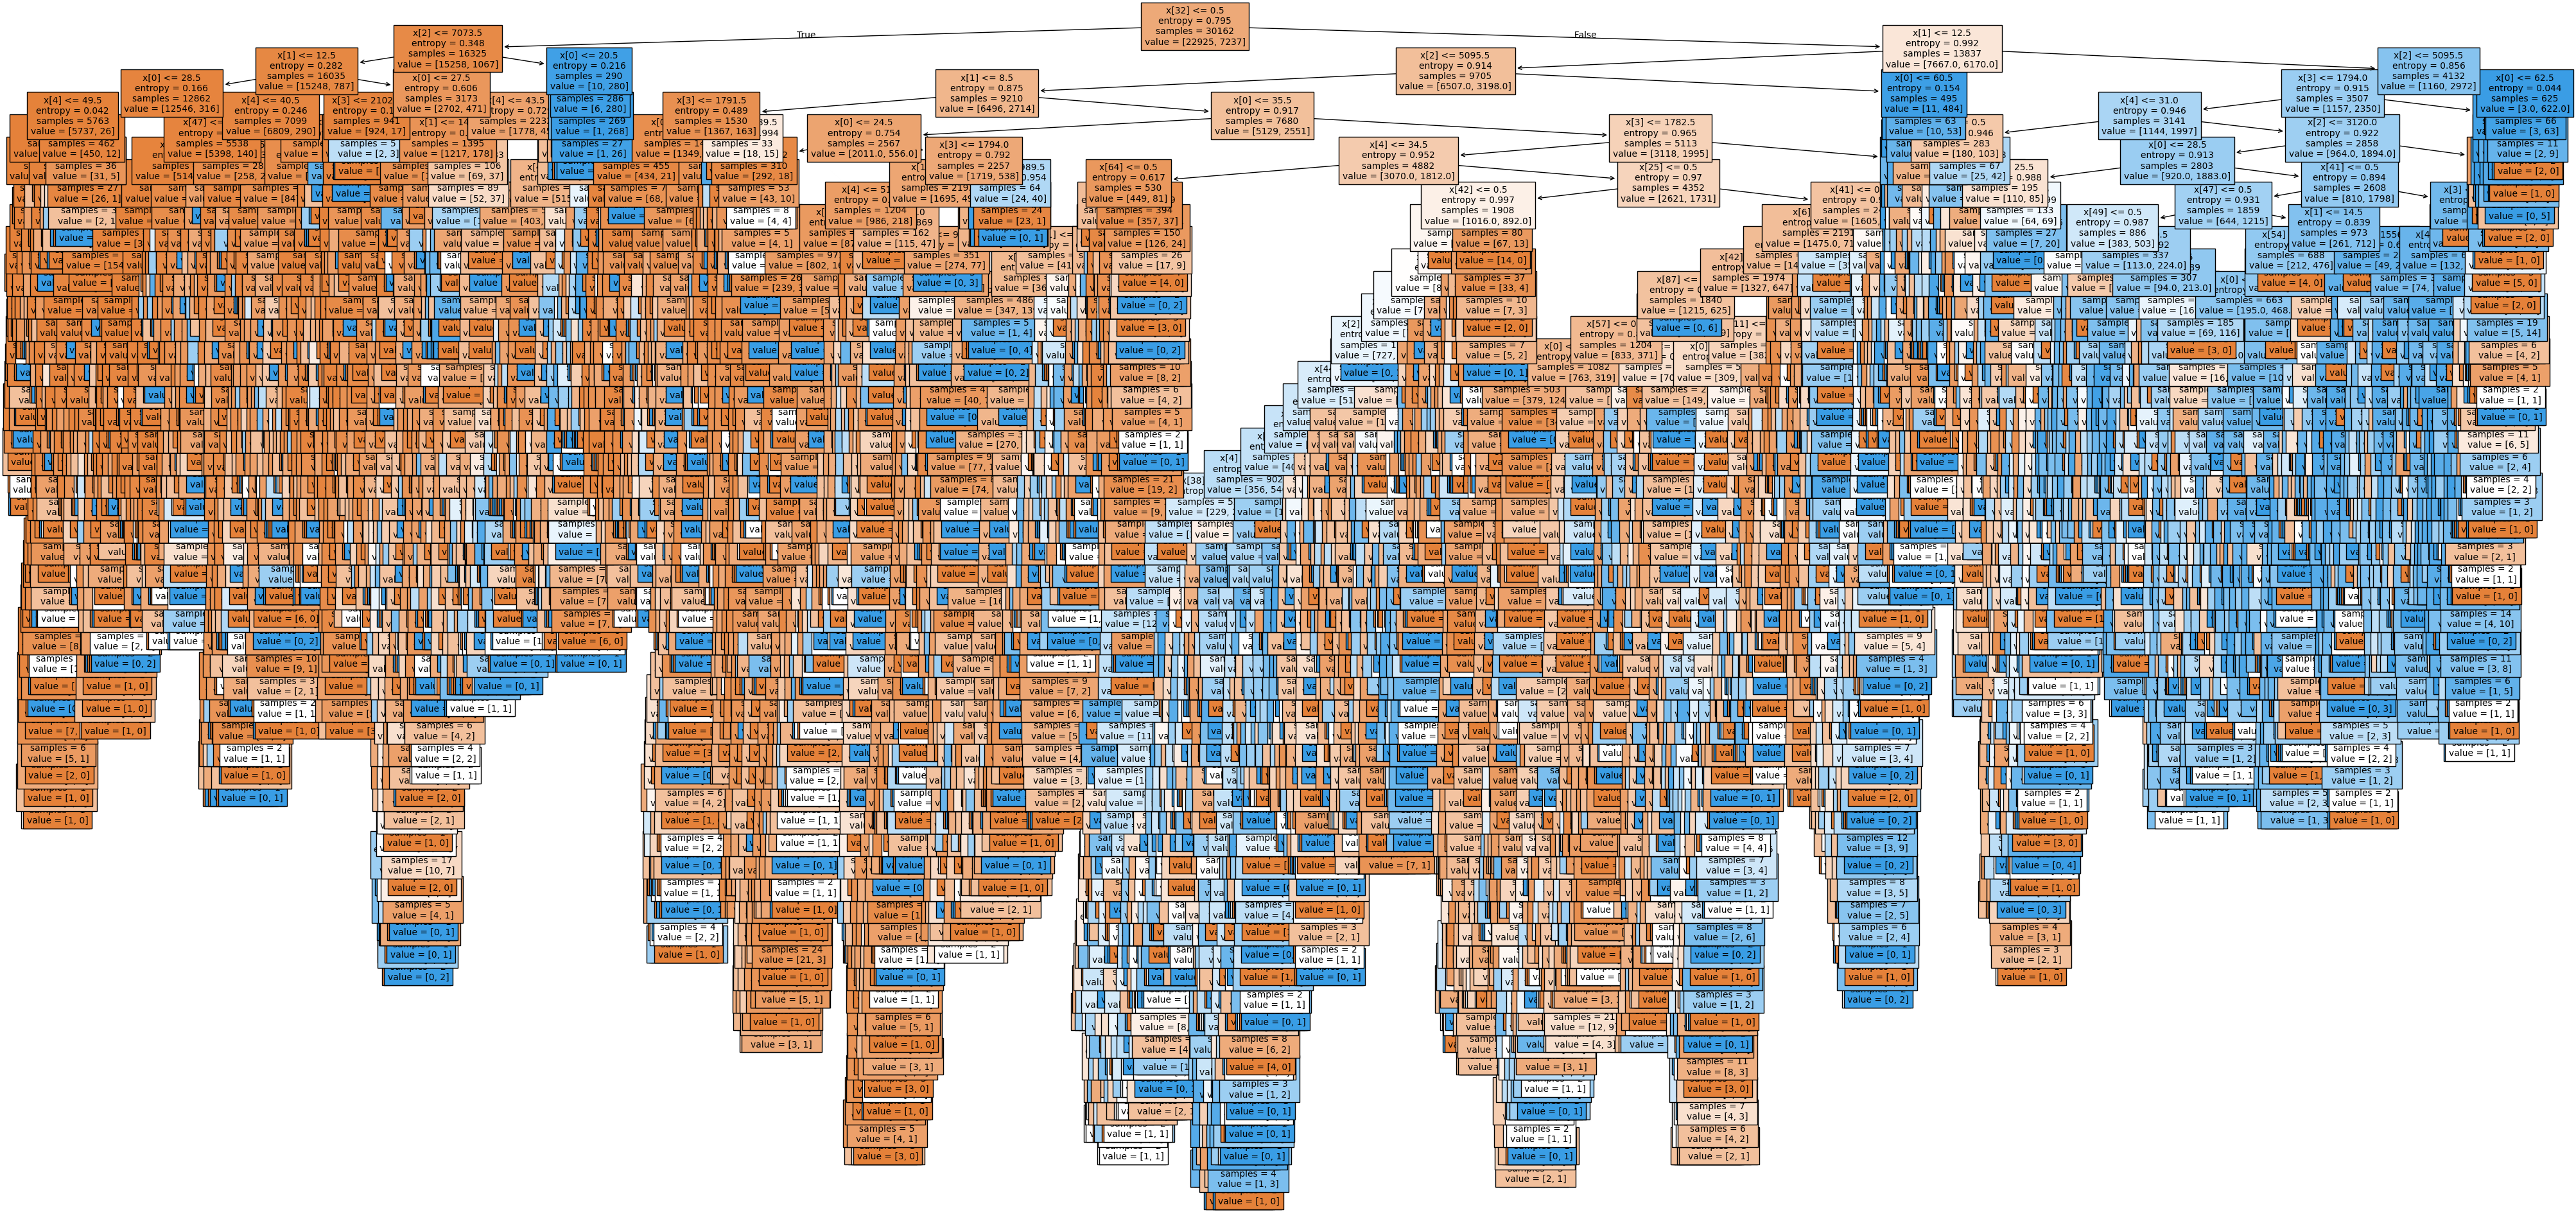

In [8]:
from sklearn import tree
from sklearn import metrics

print(NAME)

clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_id3.fit(X_train, y_train)

id3_pred = clf_id3.predict(X_test)

id3_score = metrics.accuracy_score(y_test, id3_pred)
print("ID3 Accuracy:", id3_score)
print("ID3 Report:\n", metrics.classification_report(y_test, id3_pred))

id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12,12))
sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'ID3 Accuracy Score: {id3_score:.4f}', size=15)
plt.show()

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_id3, filled=True, fontsize=10, ax=ax)
plt.savefig('id3_tree.png', dpi=100, bbox_inches='tight')
plt.show()

Câu 8

Hồ Thành Đạt - 6351071017
CART Accuracy: 0.8167558886509636
CART Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     14230
        >50K       0.62      0.60      0.61      4450

    accuracy                           0.82     18680
   macro avg       0.75      0.74      0.75     18680
weighted avg       0.81      0.82      0.82     18680



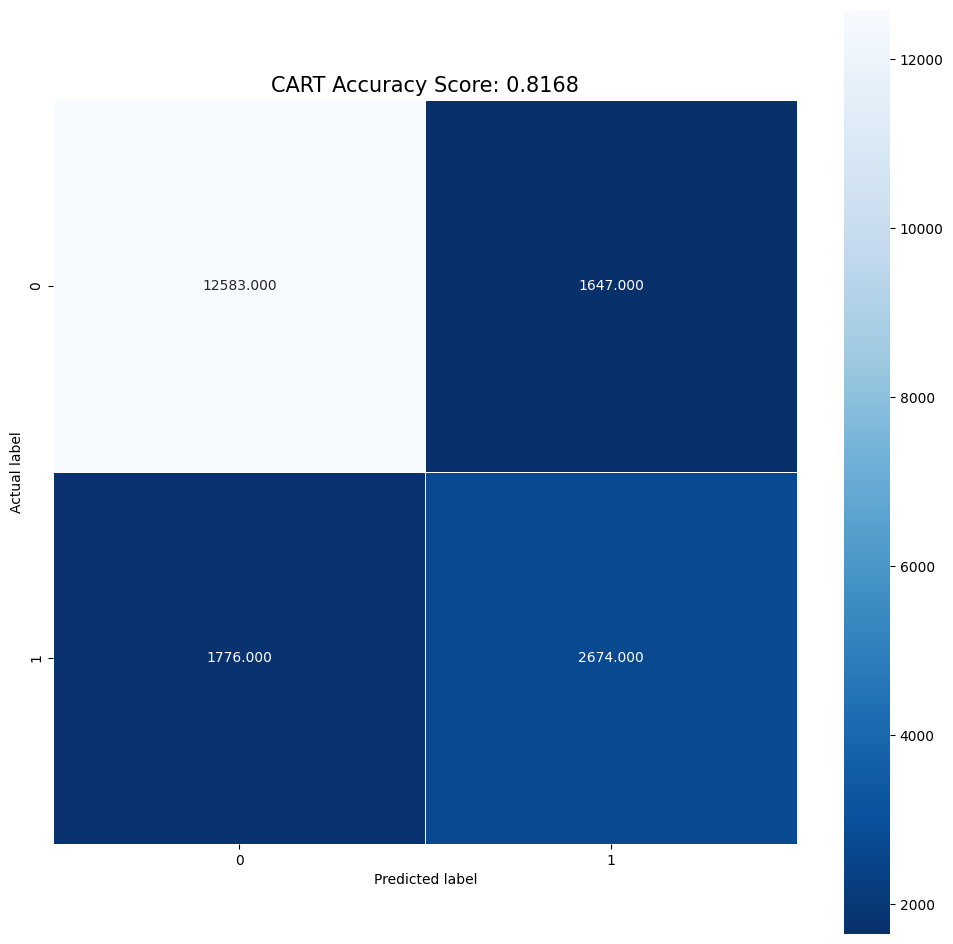

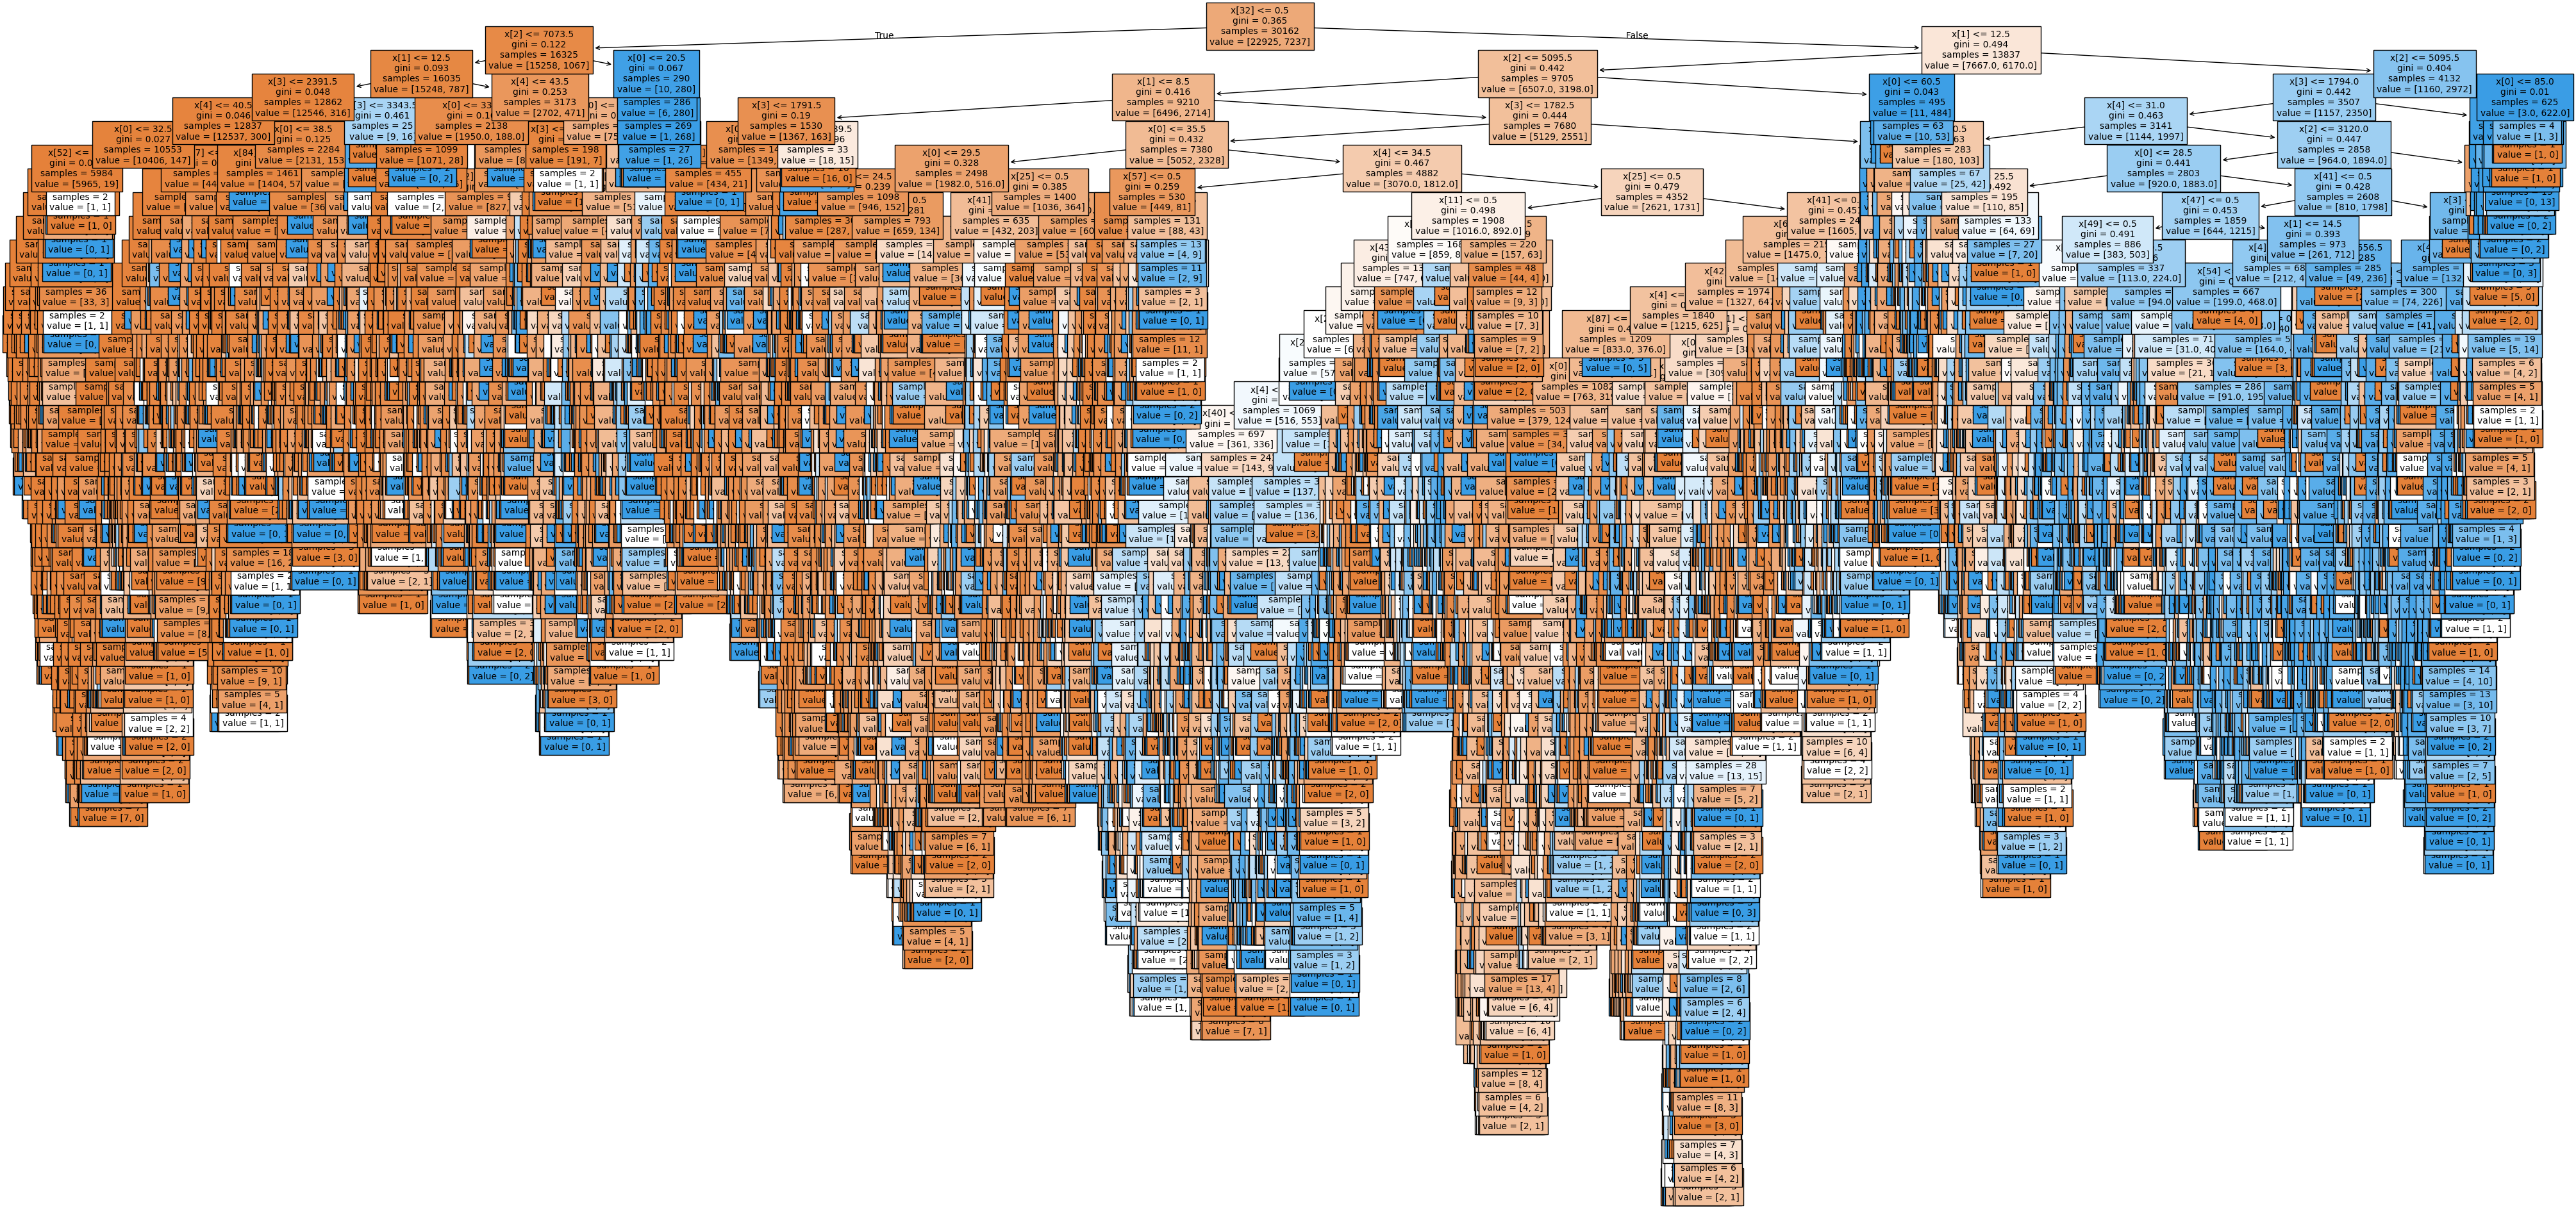

In [9]:
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)

print(NAME)

cart_score = metrics.accuracy_score(y_test, cart_pred)
print("CART Accuracy:", cart_score)
print("CART Report:\n", metrics.classification_report(y_test, cart_pred))

cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'CART Accuracy Score: {cart_score:.4f}', size=15)
plt.show()

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_cart, filled=True, fontsize=10, ax=ax)
plt.savefig('cart_tree.png', dpi=100, bbox_inches='tight')
plt.show()

Câu 9

Hồ Thành Đạt - 6351071017
Naive Bayes Accuracy: 0.8036402569593147
Naive Bayes Report:
               precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86     14230
        >50K       0.56      0.82      0.67      4450

    accuracy                           0.80     18680
   macro avg       0.75      0.81      0.76     18680
weighted avg       0.85      0.80      0.81     18680



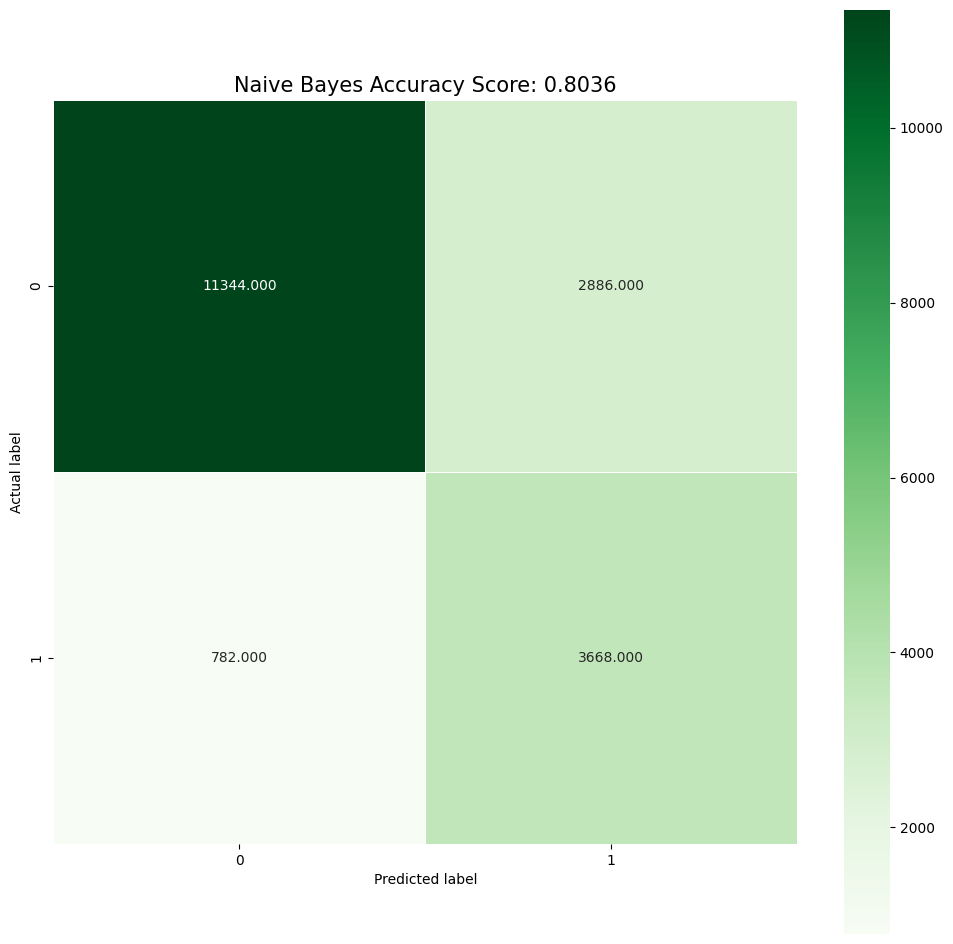

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print(NAME)

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Naive Bayes Accuracy:", bayes_score)
print("Naive Bayes Report:\n", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Naive Bayes Accuracy Score: {bayes_score:.4f}', size=15)
plt.show()

Câu 10

Hồ Thành Đạt - 6351071017
So sánh độ chính xác:
           Model  Accuracy
0  ID3 (Entropy)  0.822056
1    CART (Gini)  0.816756
2    Naive Bayes  0.803640


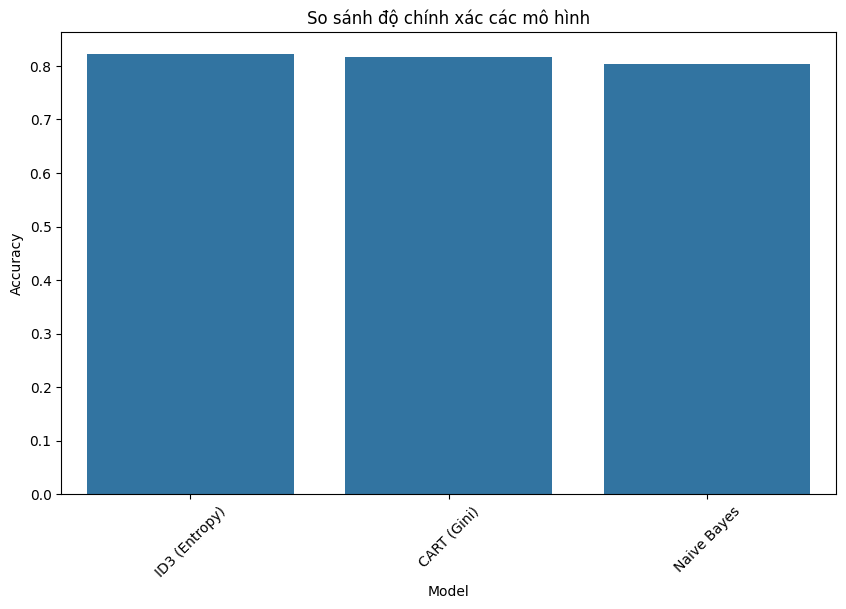

In [11]:
models = {
    'ID3 (Entropy)': id3_score,
    'CART (Gini)': cart_score,
    'Naive Bayes': bayes_score
}

print(NAME)

comparison_df = pd.DataFrame(list(models.items()), columns=['Model', 'Accuracy'])
print("So sánh độ chính xác:")
print(comparison_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Model', y='Accuracy')
plt.title('So sánh độ chính xác các mô hình')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Nhận xét:
# - Cả hai cây quyết định (ID3 và CART) đạt độ chính xác cao hơn Naïve Bayes, cho thấy chúng phù hợp hơn với dữ liệu có tương tác phức tạp giữa các đặc trưng.
# - ID3 và CART có độ chính xác tương đương, nhưng CART (Gini) có thể đơn giản hơn trong việc tính toán.
# - Naïve Bayes kém hơn do giả định độc lập giữa các đặc trưng, không phù hợp với dữ liệu Adult Income nơi các đặc trưng như education và occupation có tương quan.
# - Tổng thể, cây quyết định là lựa chọn tốt cho bài toán phân loại thu nhập này, với accuracy khoảng 0.82-0.83.